## TR1 : par fft

Nh =  20001


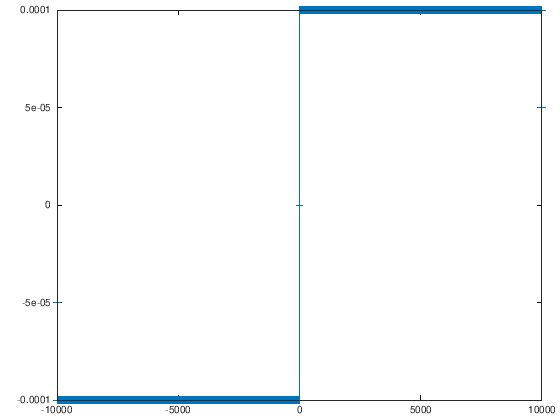

In [1]:
clear all;
% on se place dans  Signal/discret/cours/notebooks/
racine = pwd; racine = [racine(1:(findstr(racine,"Signal")+6)), "discret/cours/notebooks/"];cd (racine);

eps=1e-6;
u = @(t) ( (t>eps) + 0.5*(abs(t)<eps) );
f_h = @(t,L) -u(t+L)+2*u(t)-u(t-L);


L=10000;
k=(-L:L)';
Fs=48000;
h= f_h(k,L)/L;

plot(k,h,'+-')
Nh = length(h)

In [11]:
N = length(k);
f=1:N; f=f-1; f=f*Fs/N;
p = i*2*pi*f;
q = exp(-(1/Fs)*p); % q = z^-1
Hz = 0*h;
for i=1:N
    Hz = Hz + h(i) * q.^(i-1);
end

plot(f,abs(Hz));

Fs =  48000


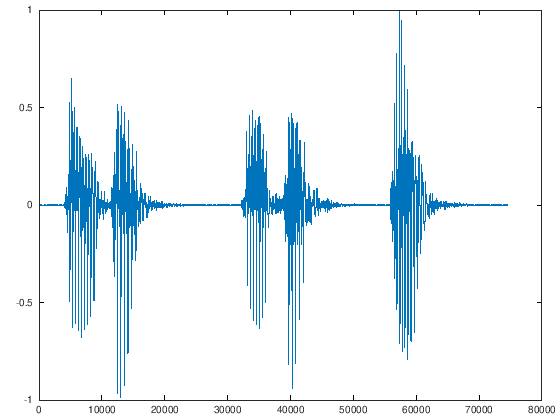

In [9]:
kk=(0:40000)';
p = @(t,M) t.*u(t) - 2*(t-M).*u(t-M) + (t-2*M).*u(t-2*M);
x = p(kk,4000) + p(kk-36000,2000);
Nx = length(x);
x = x/4000 + randn(Nx,1)/100;
[x,Fs]=audioread("RIp_un_deux.wav");
Nx = length(x);
plot(x);
Fs

In [4]:
M=256;

H_fft = fft(h,M);


start=1;
y=0*x;
for l = 1:(Nx/M)
    xl = x(start:start+M-1);
    XL_fft = fft(xl);
    YL_fft = XL_fft .* H_fft;
    y(start:start+M-1) = real(ifft(YL_fft));
    start = start + M;
end

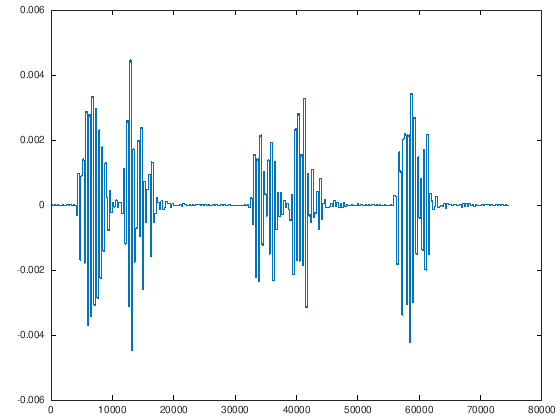

In [5]:
plot(y)

Elapsed time is 1.78919 seconds.


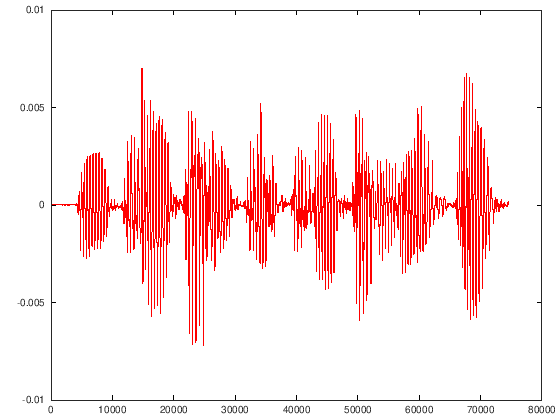

In [6]:
tic;
yf = filter(h,1,x);
toc
plot(yf,'r-');

In [7]:
M=Nh;
L=M-Nh+1;

H_fft = fft(h,M);

tic;
start=1;
y=0*x;
while (start+M-1 < Nx)
    xl = x(start:start+M-1);
    XL_fft = fft(xl);
    YL_fft = XL_fft .* H_fft;
    yl = real(ifft(YL_fft));
    y(start:start+L-1)=yl(end-L+1:end);
    start = start + L;
end
toc
subplot(311);
plot(x); subplot(312);
plot(real(ifft(H_fft))); subplot(313);
plot(y);hold on;
plot(yf,'r')